In [302]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
import numpy as np

# 1. Read the dataset file, and change it to dataframe.

In [303]:
#Read in the excel file, use the xlrd library
file_path = "Concrete_Data.xls"
data = pd.read_excel(file_path)
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


# 2. Change the last column name to ‘strength”.

In [304]:
#Grab index of length - 1 of the collumns
data.columns = data.columns[:-1].tolist() + ['strength']
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


# 3. Generate the correlation matrix and add an explanation

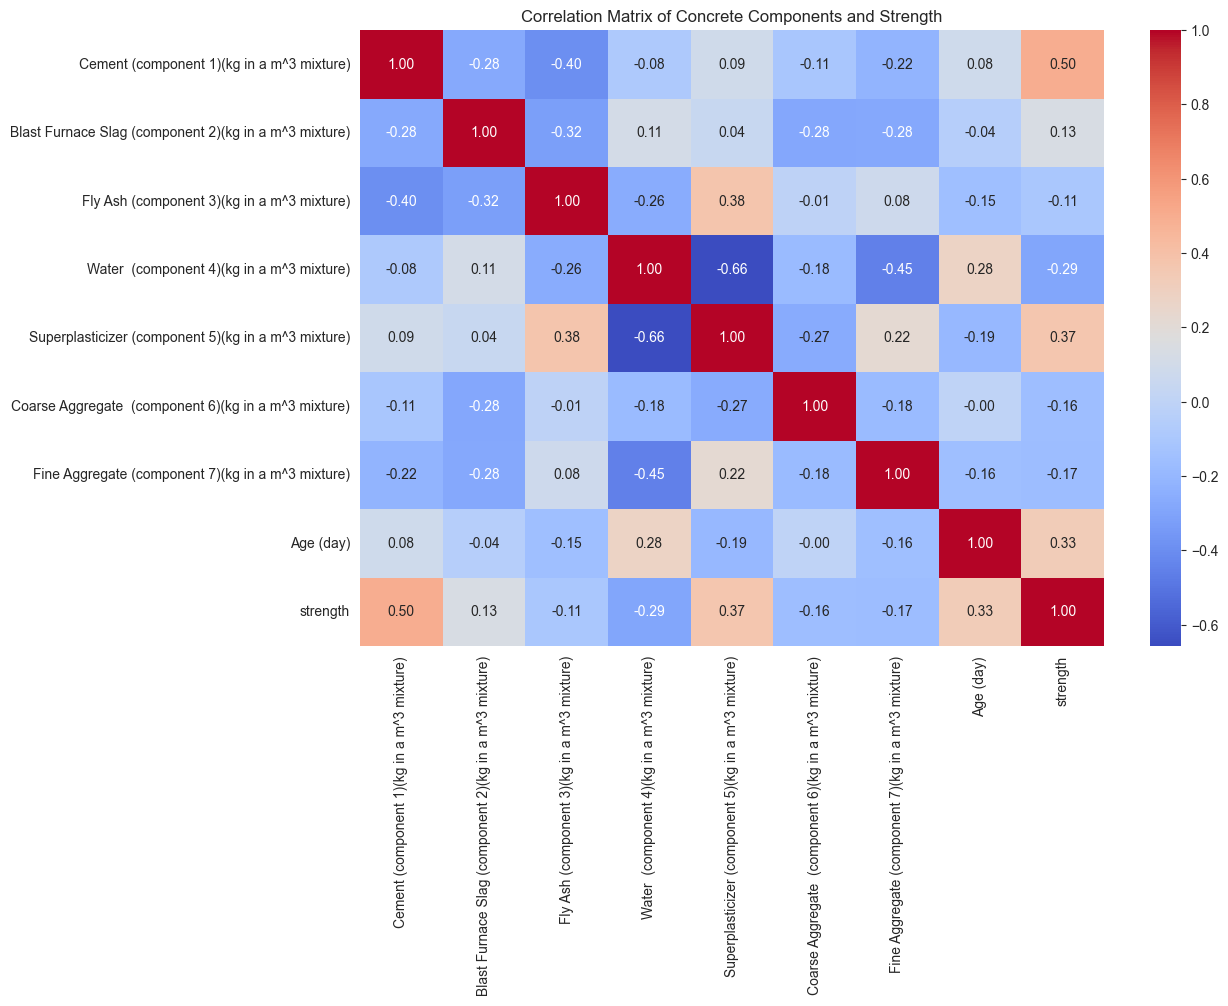

In [305]:
plt.figure(figsize=(12, 8))

# Create a heatmap for the correlation matrix, same as project 2
sns.heatmap(data.corr(), annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix of Concrete Components and Strength')
plt.show()

# 4. Separate the features columns from the target column 

In [306]:
#Drop strength column before training data
X = data.drop('strength', axis=1)
y = data['strength']

#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Standardize/Scale the features 

In [307]:
#Scaling the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Apply Linear Regression

In [308]:
#Applying built in linear regresion model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# 7. Apply Decision Tree Regressor

In [309]:
#Apply built in regressor library
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# 8. Apply Support Vector Machine Regressor

In [310]:
#Apply built in svr library
svr = SVR()
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

# 9. Print out evaluations of the three models

In [311]:
#Getting all our values
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

#Printing all out values
print("Linear Regression MSE: " + str(mse_lr))
print("Linear Regression R^2: " + str(r2_lr))
print("Decision Tree Regressor MSE: " + str(mse_dt))
print("Decision Tree R^2: " + str(r2_dt))
print("SVR MSE: " + str(mse_svr))
print("SVR R^2 " + str(r2_svr))


Linear Regression MSE: 95.97548435337704
Linear Regression R^2: 0.6275416055429022
Decision Tree Regressor MSE: 53.673239708459036
Decision Tree R^2: 0.7917067173788096
SVR MSE: 88.97832686422467
SVR R^2 0.6546959362736273


# 10. Create a bar plot to compare results

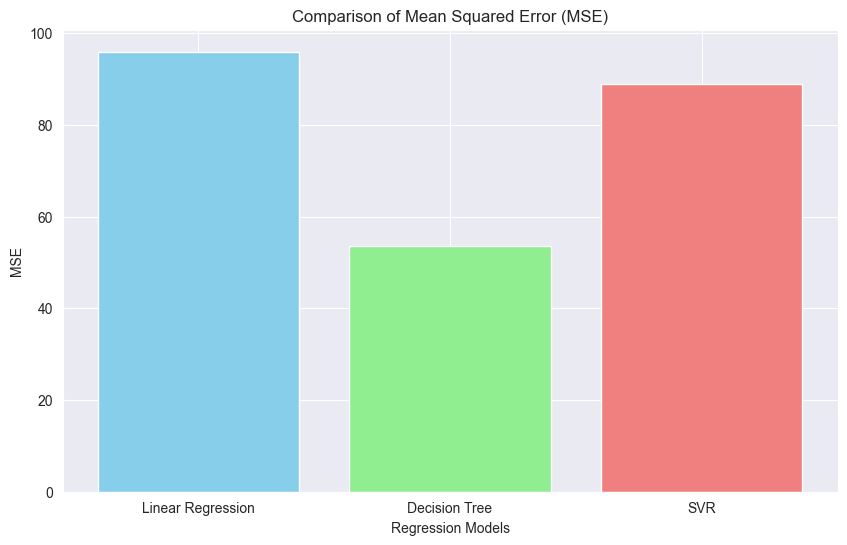

In [312]:
#Creating a new dataframe using our mse variables
evaluation_summary_lr = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'SVR'],
    'Mean Squared Error': [mse_lr, mse_dt, mse_svr],
})

#physical plot creation
plt.figure(figsize=(10, 6))
plt.bar(evaluation_summary_lr['Model'], evaluation_summary_lr['Mean Squared Error'], color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Comparison of Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.xlabel('Regression Models')
plt.show()

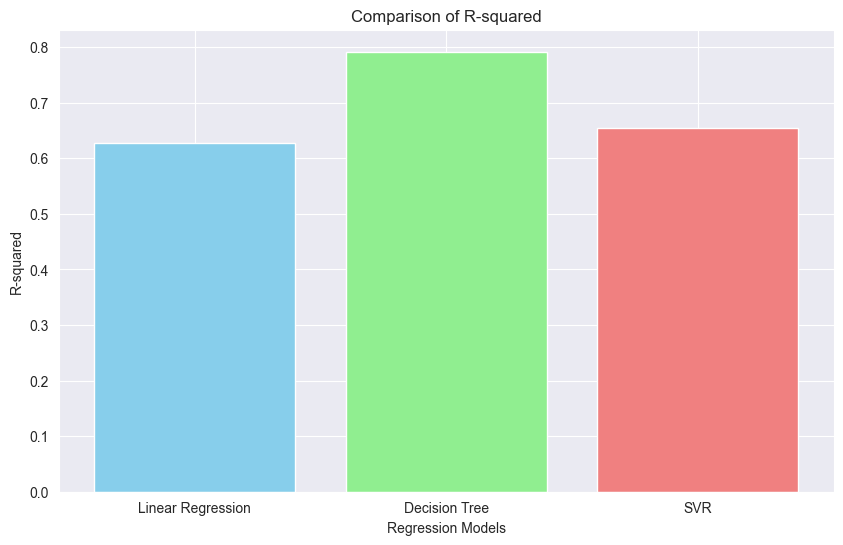

In [313]:
# R^2 Bar Graph
#Creating a new dataframe using our R^2 variables
evaluation_summary_R2 = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'SVR'],
    'R-squared': [r2_lr, r2_dt, r2_svr]
})
#physical plot creation
plt.figure(figsize=(10, 6))
plt.bar(evaluation_summary_R2['Model'], evaluation_summary_R2['R-squared'], color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Comparison of R-squared')
plt.ylabel('R-squared')
plt.xlabel('Regression Models')
plt.show()


# 11. Explanation of Results

For the MSE Bar Graph, the Decision Tree model performed the best as the lowest Bar well be the most accurate results. This means the Linear Regression model preformed the worst, and the SVR model performed the second best. 

For the R^2^ Bar graph the Decision Tree model is the most accurate as it shows that the R^2^ value of that model explains around 78%  for the data for strength. The SVR model is the second most accurate with the Linear Regression model following in last.

# 12. Create a plot with regression lines to compare the three models.

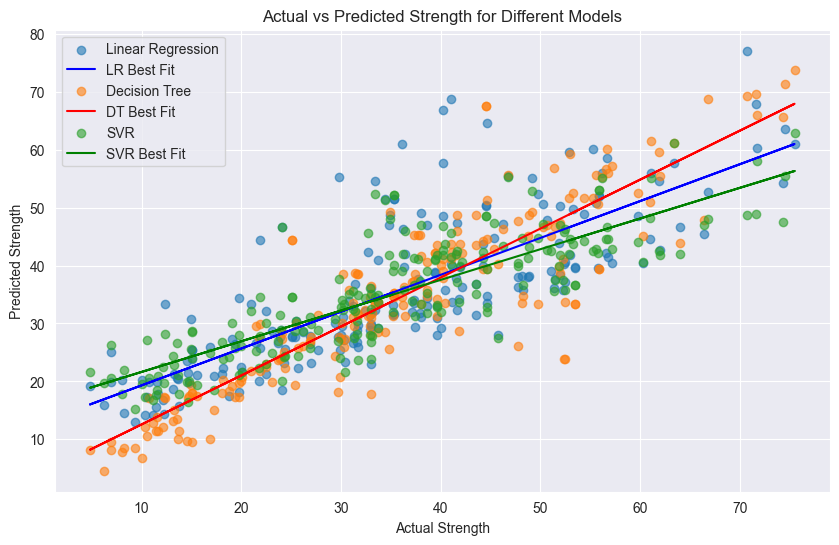

In [314]:

plt.figure(figsize=(10, 6))

# Linear Regression points and line of best fit
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.6)
m, b = np.polyfit(y_test, y_pred_lr, 1)
plt.plot(y_test, m * y_test + b, label='LR Best Fit', color='blue')

# Decision Tree points and line of best fit
plt.scatter(y_test, y_pred_dt, label='Decision Tree', alpha=0.6)
m, b = np.polyfit(y_test, y_pred_dt, 1)
plt.plot(y_test, m * y_test + b, label='DT Best Fit', color='red')

# SVR points and line of best fit
plt.scatter(y_test, y_pred_svr, label='SVR', alpha=0.6)
m, b = np.polyfit(y_test, y_pred_svr, 1)
plt.plot(y_test, m * y_test + b, label='SVR Best Fit', color='green')

# Plot setup
plt.xlabel('Actual Strength')
plt.ylabel('Predicted Strength')
plt.title('Actual vs Predicted Strength for Different Models')
plt.legend()
plt.show()

# 13. Explanation of the plot above.

The plot above shows the actual vs. predicted strength of the different models. The line of best fit for each model is also displayed. We can see that with the Linear Regression line of best fit, it struggles to map well to the predicted strength if it is a high value. The opposite is true with the SVR line of best fit as it is stuggling to accuratly predict the low strength values. The Decision Tree model has the steepest slope and does well to predict the stength values. However, towards the end of the graph this model seems to start having a bit of trouble.
